In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Monopoly

Analysis for the probabilities with Monopoly to answer the question: which are the best houses to buy?

To answer this question we will create a simulated version of Monopoly and determine the probabilities to land on each square. The square with the highest probability will be the best square to have.

![monopoly](monopoly_1.jpg)

## Squares

Each edge has 9 positions and there are 4 edges. There are 4 corners. Which gives a total of 40 positions where a player can land. The labels are numbered starting at GO.

### Labels

In [2]:
squares_labels = ['start', 'b1', 'cc1', 'b2', 'it', 't1', 
                  'lb1', 'c1', 'lb2', 'lb3', 'jail', 'p1', 
                  'ec', 'p2', 'p3', 'ts2', 'o1', 'cc2', 
                  'o2', 'o3', 'p', 'r1', 'c2', 'r2', 'r3', 
                  'ts3', 'y1', 'y2', 'ww', 'y3', 'gtj', 
                  'g1', 'g2', 'cc3', 'g3', 'ts4', 'c3', 
                  'db1', 'st', 'db2']

squares_total = len(squares_labels)
print('There are {} squares.'.format(squares_total))

There are 40 squares.


### Descriptions

We also want to know the proper names, so we don't have to look up the labels.

In [3]:
squares_description = ['Start', 'Brown 1', 'Community Chest 1', 'Brown 2', 
                       'Income Tax', 'Train Station 1', 'Light Blue 1', 
                       'Chance 1', 'Light Blue 2', 'Light Blue 3', 'Jail', 
                       'Purple 1', 'Electric Company', 'Purple 2', 
                       'Purple 3', 'Train Station 2', 'Orange 1', 
                       'Community Chest 2', 'Orange 2', 'Orange 3', 
                       'Free Parking', 'Red 1', 'Chance 2', 'Red 2', 
                       'Red 3', 'Train Station 3', 'Yellow 1', 'Yellow 2', 
                       'Water Works', 'Yellow 3', 'Go to Jail', 'Green 1', 
                       'Green 2', 'Community Chest 3', 'Green 3', 
                       'Train Station 4', 'Chance 3', 'Dark Blue 1', 
                       'Super Tax', 'Dark Blue 2']

In [4]:
print('There are {} descriptions.'.format(len(squares_description)))

There are 40 descriptions.


### Purchasable

We want to know if they are purchasable so we can sort on that later.

In [5]:
squares_purchasable = [False, True, False, True, False, 
                       True, True, False, True, True, 
                       False, True, True, True, True, 
                       True, True, False, True, True, 
                       False, True, False, True, True, 
                       True, True, True, True, True, 
                       False, True, True, False, True, 
                       True, False, True, False, True]

### Grouping

We want to know in what group they are so we can aggregate our data later.

In [6]:
squares_aggregate = ['Start', 'Brown', 'Community Chest', 'Brown', 
                     'Income Tax', 'Train Station', 'Light Blue', 
                     'Chance', 'Light Blue', 'Light Blue', 'Jail', 
                     'Purple', 'Electric Company', 'Purple', 'Purple', 
                     'Train Station', 'Orange', 'Community Chest', 
                     'Orange', 'Orange', 'Free Parking', 'Red', 
                     'Chance', 'Red', 'Red', 'Train Station', 'Yellow', 
                     'Yellow', 'Water Works', 'Yellow', 'Go to Jail', 
                     'Green', 'Green', 'Community Chest', 'Green', 
                     'Train Station', 'Chance', 'Dark Blue', 
                     'Super Tax', 'Dark Blue']

## Cards

There are two decks of cards.

* Community Cards
* Chance Cards

Each deck contains 16 cards.

### Community Cards

Monopoly has $16$ community cards.

![cc](monopoly_2.jpg)

Because we are only determining the probabilities, we are only interested in the following cards:

* advance to go
* go to jail
* get out of jail, free
* go back 2 spaces

### Community deck implementation

We implement the community deck in a class. The class keeps track of a list with $16$ cards. An index points to the next card. When we are out of cards, we reset the index and reshuffle the cards.

In [7]:
from random import shuffle

class CommunityDeck():
    def __init__(self):
        self.deck = [0] * 16
        self.deck[0] = 'gtg' # go to go
        self.deck[1] = 'gtj' # go to jail
        self.deck[2] = 'goj' # get out of jail 
        self.deck[3] = 'gb2' # go back 2 steps
        self.index = 16
    
    def draw_card(self):
        if self.index >= len(self.deck):
            self.index = 0
            shuffle(self.deck)
        card = self.deck[self.index]
        self.index += 1
        return card

Now we test it:

In [8]:
deck = CommunityDeck()
deck.deck

['gtg', 'gtj', 'goj', 'gb2', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [9]:
deck.draw_card()

0

In [10]:
deck.deck

[0, 'goj', 0, 0, 0, 'gtj', 'gtg', 0, 'gb2', 0, 0, 0, 0, 0, 0, 0]

In [11]:
deck.index

1

### Chance Cards

Monopoly has $16$ chance cards.

![chance](monopoly_3.jpg)

Because we are only determining the probabilities, we are only interested in the following cards:

* go back three spaces
* get out of jail free
* advance to go
* advance to illinois avenue (R3)
* go to jail

### Chance deck implementation

We implement the chance deck in a class. The class keeps track of a list with $16$ cards. An index points to the next card. When we are out of cards, we reset the index and reshuffle the cards.

In [12]:
from random import shuffle

class ChanceDeck():
    def __init__(self):
        self.deck = [0] * 16
        self.deck[0] = 'gtg' # go to go
        self.deck[1] = 'gtj' # go to jail
        self.deck[2] = 'goj' # get out of jail
        self.deck[3] = 'gb3' # go back 3
        self.deck[4] = 'r3'  # go to red 3 (r3)
        self.index = 16
    
    def draw_card(self):
        if self.index >= len(self.deck):
            self.index = 0
            shuffle(self.deck)
        card = self.deck[self.index]
        self.index += 1
        return card

Now we test it:

In [13]:
deck = ChanceDeck()
deck.deck

['gtg', 'gtj', 'goj', 'gb3', 'r3', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [14]:
deck.draw_card()

0

In [15]:
deck.deck

[0, 0, 0, 0, 'r3', 'gtg', 'gtj', 'gb3', 'goj', 0, 0, 0, 0, 0, 0, 0]

In [16]:
deck.index

1

## Dice

We will be implementing the dice as a class. This allows us to encapsulate how the result is determined. It makes it easier to implements other scenarios such as throwing with multiple dices.

In [17]:
from random import randint

class Dice():
    def __init__(self, dices = 1, sides = 6):
        self.dices = dices
        self.sides = 6
    
    def throw(self):
        total = 0 
        for i in range(self.dices):
            total += randint(1, self.sides)
        return total

Rolling one time:

In [18]:
dice = Dice()
dice.throw()

1

### Simple: one dice with six sides

A simple setup would be one dice with six sides. This will give uniformly distributed probabilities.

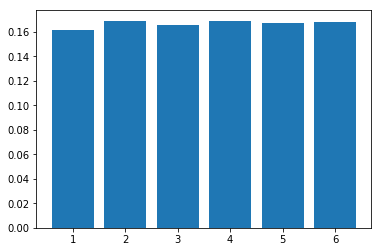

In [19]:
dice = Dice()
sides = [0] * dice.dices * dice.sides
N = 10000
for i in range(N): sides[dice.throw()-1] += 1
sides = np.array(sides) / N
bar(range(1,len(sides)+1), sides);

### Advanced: two dice with four sides

A more advanced set up would be to play with two dices and four sides. This will give normally distributed probabilities.

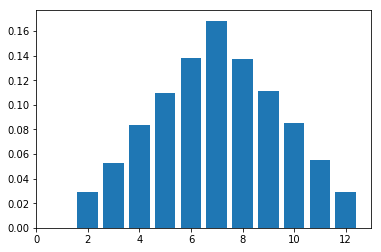

In [20]:
dice = Dice(2,4)
sides = [0] * dice.dices * dice.sides
N = 10000
for i in range(N): sides[dice.throw()-1] += 1
sides = np.array(sides) / N
bar(range(1,len(sides)+1), sides);

## Monopoly simulation

### Algorithm

Here we are going to simulate a game for $N$ amount of rounds. The game algorithm is simple:

1. Roll the dice
2. Move to the new position
3. Increment the square counter for that position
4. Check and handle go to jail
5. Check and handle community chest
6. Check and handle chance

### Modulo arithmetic for position tracking

We can easily keep track of our position with modulo arithemetic. Let $C$ be our position (or `index`), $d$ the result from throwing the dice, and $n$ the current round. To determine our new position we calculate:

$$ C_{n+1} \equiv C_n+d \pmod{40}$$

The modulo is $40$ because that are the total amount of squares.

### Implementation

Below is the implementation for the Monopoly simulation.

In [21]:
dice = Dice()
community_deck = CommunityDeck()
chance_deck = ChanceDeck()

index = 0 # position
total_squares = len(squares_labels)
squares = [0] * total_squares

rounds = 1000000

for i in range(rounds):
    
    # Throw the dice and move our position on the board.
    steps = dice.throw()
    index = (index + steps) % total_squares
    squares[index] += 1
    
    # We landed on go to jail.
    if squares_labels[index] is 'gtj': 
        index = squares_labels.index('jail')
    
    # We landed on the community card.
    if squares_labels[index] in ['cc1', 'cc2', 'cc3']:
        card = community_deck.draw_card()
        if card is 'gtg': index = squares_labels.index('start')
        if card is 'gtj': index = squares_labels.index('jail')
        if card is 'gb2': 
            if index >= 2: index -= 2
            if index < 2: index = total_squares-abs(index-2)-1
    
    # We landed on the chance card.
    if squares_labels[index] in ['c1', 'c2', 'c3']:
        card = chance_deck.draw_card()
        if card is 'gtg': index = squares_labels.index('start')
        if card is 'gtj': index = squares_labels.index('jail')
        if card is 'r3': index = squares_labels.index('r3')
        if card is 'gb3':
            if index >= 3: index -= 3
            if index < 3: index = total_squares-abs(index-3)-1

It takes around $2.7$ seconds to run a game when $N=1,000,000$.

## Detailed probability analysis

Now we can proceed to analyze our results.

### Determining probabilities

With the number of times that each square is visited we can calculate the probabilities. The probability that a square is visited is:

$$ P(\bar{x}=x) = \dfrac{\text{Times visited}}{\text{# of rounds}} $$

We also want to create a `DataFrame` in Python to easily keep track of everything.

In [22]:
import pandas as pd
df = pd.DataFrame(index=range(total_squares))
df['Square'] = squares_labels
df['Description'] = squares_description
df['Purchasable'] = squares_purchasable
df['Visited'] = squares
df['Probability'] = df['Visited'] / rounds
df['Aggregate'] = squares_aggregate

We can calculate a quick summary about the data:

In [23]:
print('Total rounds: {}'.format(rounds))
print('Visited avg:  {}'.format(df['Visited'].mean()))
print('Visited min:  {}'.format(df['Visited'].min()))
print('Visited max:  {}'.format(df['Visited'].max()))
print('Visited std:  {:.2f}'.format(df['Visited'].std()))

Total rounds: 1000000
Visited avg:  25000.0
Visited min:  18235
Visited max:  33537
Visited std:  4600.47


### Plot of probabilities by square

If we sort these values descending on the probability, we can easily see which squares have the highest probability to be visited.

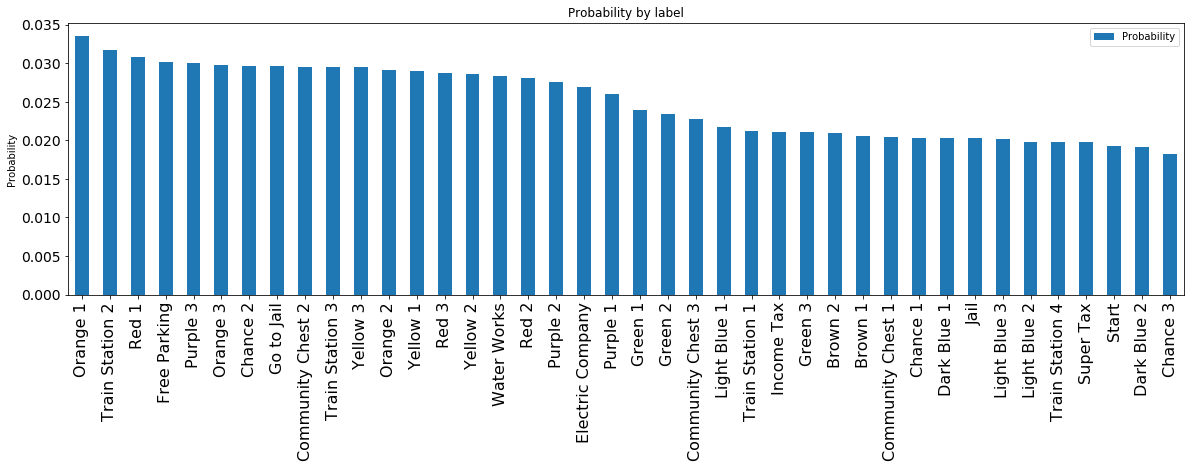

In [24]:
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=14) 
df[['Description', 'Probability']].sort_values(by='Probability', ascending=False)\
    .plot(kind='bar', figsize=(20,5))
plt.xticks(range(total_squares), df[['Description', 'Probability']]
    .sort_values(by='Probability', ascending=False)['Description'])
plt.ylabel('Probability')
plt.title('Probability by label');

Here we can conclude that `Orange 1` is the most visited square. Also notice that `Orange 2` and `Orange 3` are pretty high. It seems that `Orange` is the best street to have.

### Table of probabilities by square

Below is the full table with all the squares and their corresponding values.

In [25]:
df.loc[:, 'Square':'Probability'].sort_values(by='Probability', ascending=False)

,Square,Description,Purchasable,Visited,Probability
16,o1,Orange 1,True,33537,0.033537
15,ts2,Train Station 2,True,31684,0.031684
21,r1,Red 1,True,30838,0.030838
20,p,Free Parking,False,30159,0.030159
14,p3,Purple 3,True,30037,0.030037
19,o3,Orange 3,True,29762,0.029762
22,c2,Chance 2,False,29668,0.029668
30,gtj,Go to Jail,False,29594,0.029594
17,cc2,Community Chest 2,False,29559,0.029559
25,ts3,Train Station 3,True,29463,0.029463


### Top 10 highest probability squares

The top 10 squares that have the highest probability for a player to land on are:

In [26]:
df.loc[df['Purchasable'] == True, 'Square':'Probability']\
    .sort_values('Probability', ascending=False).head(10)

,Square,Description,Purchasable,Visited,Probability
16,o1,Orange 1,True,33537,0.033537
15,ts2,Train Station 2,True,31684,0.031684
21,r1,Red 1,True,30838,0.030838
14,p3,Purple 3,True,30037,0.030037
19,o3,Orange 3,True,29762,0.029762
25,ts3,Train Station 3,True,29463,0.029463
29,y3,Yellow 3,True,29439,0.029439
18,o2,Orange 2,True,29134,0.029134
26,y1,Yellow 1,True,28953,0.028953
24,r3,Red 3,True,28730,0.028730


The total probability for all 10 squares is:

In [27]:
df.loc[df['Purchasable'] == True].sort_values('Probability', ascending=False)\
    .head(10)['Probability'].sum()

0.30157699999999998

## High-level probability analysis

We want to answer the following questions:

1. What are the best streets to have?
2. What is the probability to be in jail?
3. What is the probability to draw a card?

### Aggregating (grouping by)

To find what the probabilities are per street, chance, community chest, etc., we are going to aggregate the possibilities.

In [28]:
aggregated_df = pd.DataFrame(df.groupby(['Aggregate'])['Probability'].sum()).reset_index()

Now we plot the aggregated probabilities.

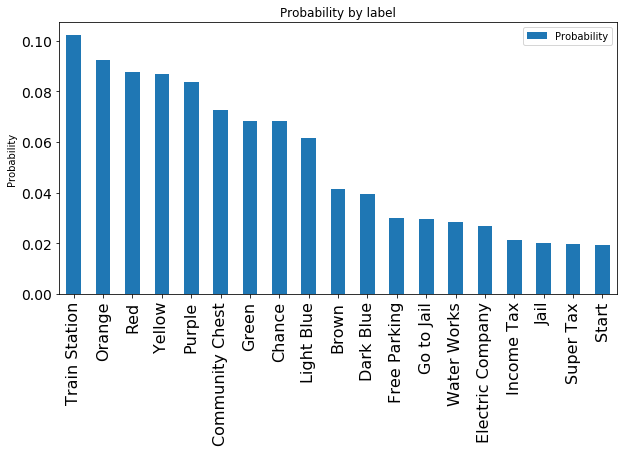

In [29]:
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=14) 
aggregated_df[['Aggregate', 'Probability']].sort_values(by='Probability', ascending=False)\
    .plot(kind='bar', figsize=(10,5))
plt.xticks(range(len(aggregated_df.index)), aggregated_df[['Aggregate', 'Probability']]
    .sort_values(by='Probability', ascending=False)['Aggregate'])
plt.ylabel('Probability')
plt.title('Probability by label');

### Overview of all the probabilities by aggregate

A total overview of all the probabilities can be found in the table below:

In [30]:
aggregated_df.sort_values('Probability', ascending=False)

,Aggregate,Probability
16,Train Station,0.102135
11,Orange,0.092433
13,Red,0.087578
18,Yellow,0.086976
12,Purple,0.083582
2,Community Chest,0.072749
7,Green,0.068324
1,Chance,0.068262
10,Light Blue,0.061636
0,Brown,0.041500


### Train station probabilities

We can conclude that `Train Station` has the highest probability to land on. However, we need to take into account that there are four squares to land on.

In [31]:
df.loc[df['Aggregate'] == 'Train Station', 'Square':'Probability'].sort_values('Probability', ascending=False)

,Square,Description,Purchasable,Visited,Probability
15,ts2,Train Station 2,True,31684,0.031684
25,ts3,Train Station 3,True,29463,0.029463
5,t1,Train Station 1,True,21201,0.021201
35,ts4,Train Station 4,True,19787,0.019787


### Probability to be in jail

To find the total probability to be in jail, we need to take into account that:

 * We can land on jail.
 * We can land on go to jail.
 * There is one community card which sends you to jail.
 * There is one chance card which sends you to jail.
 
Each deck has $16$ cards, therefore the probability to draw go to jail is $P(\bar{x}=\text{go to jail})=\dfrac{1}{16}$.

$$P(\bar{x}=\text{in jail}) = P(\bar{x}=\text{jail}) + P(\bar{x}=\text{go to jail}) + \dfrac{1}{16}\left[ P(\bar{x}=\text{community chest}) + P(\bar{x}=\text{chance})\right] $$

In [32]:
P_jail           = sum(aggregated_df.loc[aggregated_df['Aggregate'] == 'Jail'           ]['Probability'])
P_go_to_jail     = sum(aggregated_df.loc[aggregated_df['Aggregate'] == 'Go to Jail'     ]['Probability'])
P_community_card = sum(aggregated_df.loc[aggregated_df['Aggregate'] == 'Community Chest']['Probability'])
P_chance_card    = sum(aggregated_df.loc[aggregated_df['Aggregate'] == 'Chance'         ]['Probability'])

In [33]:
P_jail + P_go_to_jail + 1/16 * (P_community_card + P_chance_card)

0.058661187500000003

### Probability to draw a card

To find the probability to draw a card, we simply calculate:

$$ P(\bar{x}=\text{draw a card}) = P(\bar{x}=\text{community chest}) + P(\bar{x}=\text{chance})$$

In [34]:
P_community_card + P_chance_card

0.141011

Where the probabilities for the community chest square are:

In [35]:
df.loc[df['Aggregate'] == 'Community Chest', 'Square':'Probability'].sort_values('Probability', ascending=False)

,Square,Description,Purchasable,Visited,Probability
17,cc2,Community Chest 2,False,29559,0.029559
33,cc3,Community Chest 3,False,22722,0.022722
2,cc1,Community Chest 1,False,20468,0.020468


And the probabilities for the chance square are:

In [36]:
df.loc[df['Aggregate'] == 'Chance', 'Square':'Probability'].sort_values('Probability', ascending=False)

,Square,Description,Purchasable,Visited,Probability
22,c2,Chance 2,False,29668,0.029668
7,c1,Chance 1,False,20359,0.020359
36,c3,Chance 3,False,18235,0.018235
